### [Example: Customized Partial Dependence Plots](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py)

- Plot PD curves for `age` and `bmi` for the decision tree. In this case [plot_partial_dependence](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.plot_partial_dependence.html#sklearn.inspection.plot_partial_dependence) expects two curves.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

In [6]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

tree = DecisionTreeRegressor().fit(X, y)
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(100, 100),
                                 tol=1e-2, 
                                 max_iter=2500, 
                                 random_state=0)).fit(X, y)

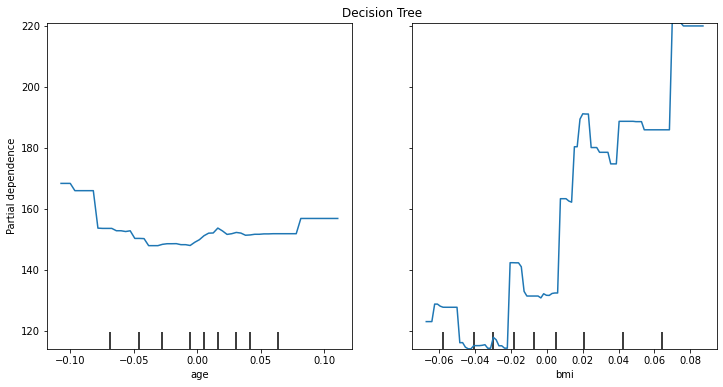

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(tree, X, ["age", "bmi"], ax=ax)

- Plot PD curves for the Perceptron. In this case `line_kw` is used to change the curve color.

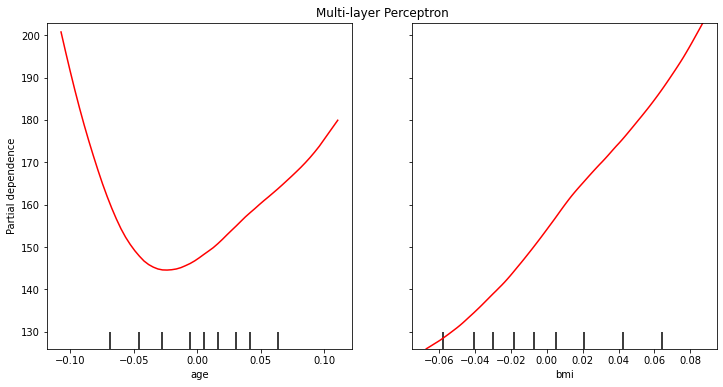

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = plot_partial_dependence(mlp, X, ["age", "bmi"], ax=ax,
                                   line_kw={"color": "red"})

- `tree_disp` and `mlp_disp` contain all the info needed to recreate the plots.

Text(0.5, 1.0, 'Multi-layer Perceptron')

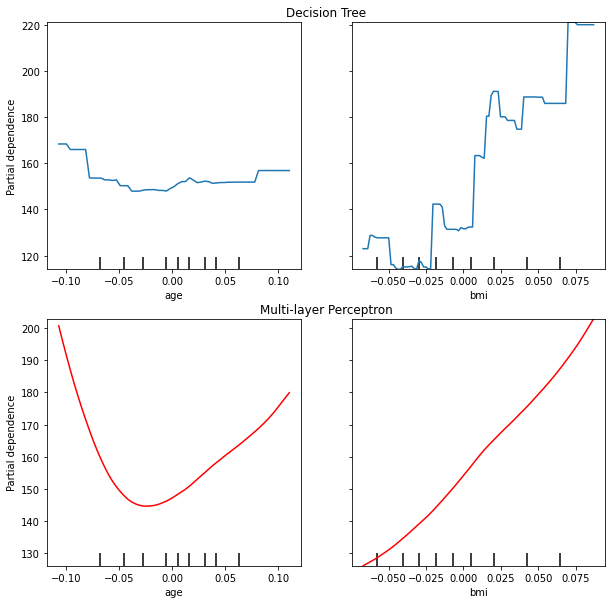

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
tree_disp.plot(ax=ax1)
ax1.set_title("Decision Tree")
mlp_disp.plot(ax=ax2, line_kw={"color": "red"})
ax2.set_title("Multi-layer Perceptron")

- Here we compare curves by plotting on top of each other. To plot the PD curves on the same axis, pass the axes to `plot` as a list.

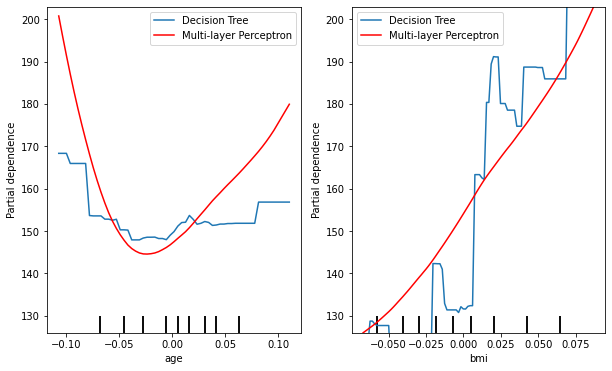

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron",
                                      "color": "red"})
ax1.legend()
ax2.legend()

- `tree_disp.axes_` is a numpy array. It can be passed to `mlp_disp` to have the same affect of drawing the plots on top of each other. 

- Also: `mlp_disp.figure_` stores the figure, for resizing after calling `plot`. This time `tree_disp.axes_` has two dimensions - the plot will only show the y label and y ticks on the left most plot.

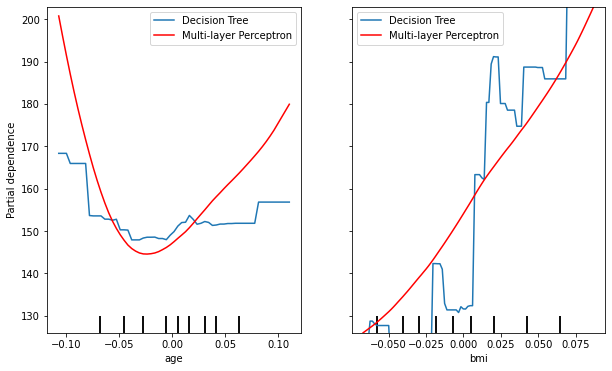

In [11]:
tree_disp.plot(line_kw={"label": "Decision Tree"})
mlp_disp.plot(line_kw={"label": "Multi-layer Perceptron", "color": "red"},
              ax=tree_disp.axes_)
tree_disp.figure_.set_size_inches(10, 6)
tree_disp.axes_[0, 0].legend()
tree_disp.axes_[0, 1].legend()

- Plot the PD curve for only one feature.

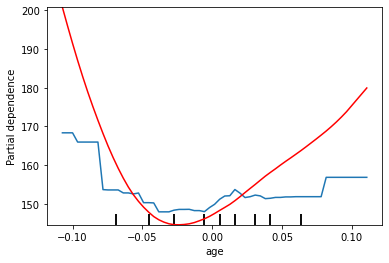

In [12]:
tree_disp = plot_partial_dependence(tree, X, ["age"])
mlp_disp = plot_partial_dependence(mlp, X, ["age"],
                                   ax=tree_disp.axes_,
                                   line_kw={"color": "red"})